In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
dataset = pd.read_csv('./placement.csv')
dataset.head(3)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25


In [19]:
# Checking missing value inn the dataset.
dataset.isnull().sum()

cgpa       0
package    0
dtype: int64

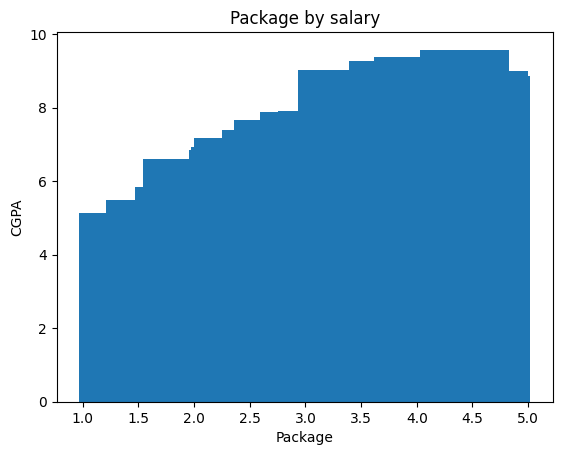

In [21]:
plt.bar(dataset['package'], dataset['cgpa'])
plt.xlabel('Package')
plt.ylabel('CGPA')
plt.title('Package by salary')
# plt.xticks(rotation=90) 
plt.show()

In [22]:
X = dataset[['cgpa']]
y = dataset['package']

In [53]:
# spliting the data in train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)


In [54]:
regressor = LinearRegression()


In [55]:
regressor.fit(X_train,y_train)

LinearRegression()

In [56]:
y_pred = regressor.predict(X_test)
y_pred

array([2.77882453, 3.13244816, 3.19518783, 2.39097925, 3.52029343,
       3.75984492, 3.16096619, 2.54497664, 3.1723734 , 3.48607179,
       1.91187627, 2.351054  , 3.67999442, 2.7560101 , 3.46896097,
       3.04119045, 2.32823958, 3.20089144, 2.1799458 , 3.30925997,
       2.45371893, 2.89860027, 3.31496358, 2.87008224, 3.3320744 ,
       2.19705662, 1.42706968, 2.71038124, 3.17807701, 2.32823958,
       3.73703049, 2.95563634, 3.67429082, 2.97274716, 2.5906055 ,
       3.34348161, 2.47653336, 3.06970848, 4.16480101, 2.95563634,
       3.09252291, 3.10963373, 3.91384231, 2.72178846])

In [57]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.08169292313214517
R-squared: 0.78603412362727


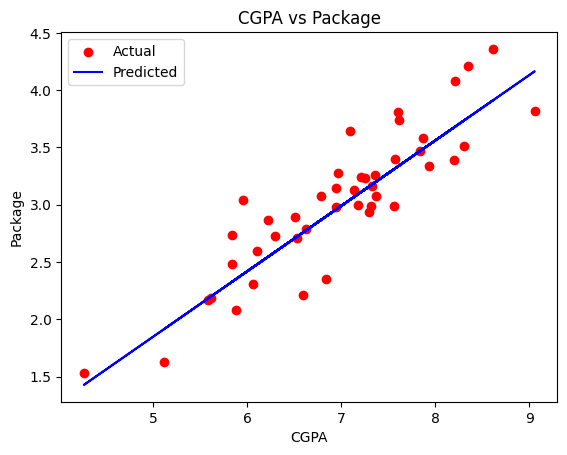

In [58]:
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.plot(X_test, y_pred, color='blue', label='Predicted')
plt.title('CGPA vs Package')
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.legend()
plt.show()

In [59]:
print(f"Intercept: {regressor.intercept_}")
print(f"Coefficient: {regressor.coef_}")

#


Intercept: -1.0026668786166488
Coefficient: [0.57036069]


In [60]:
tolerance = 0.1 
percentage_diff = np.abs((y_test - y_pred) / y_test)
accurate_predictions = np.sum(percentage_diff <= tolerance)
accuracy = accurate_predictions / len(y_test) * 100
print(f"Accuracy (within {tolerance*100}% tolerance): {accuracy:.2f}%")

Accuracy (within 10.0% tolerance): 70.45%
